In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0


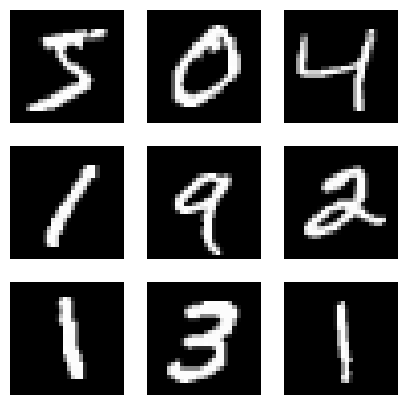

In [4]:
plt.figure(figsize=(5,5))
for i in range(9):  
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()


In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Converts 2D image into 1D vector
    keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    keras.layers.Dropout(0.2),  # Reduces overfitting
    keras.layers.Dense(10, activation='softmax')  # Output layer (10 neurons for 0-9 digits)
])


c:\Users\HP\OneDrive\Documents\HandwrittenDigitRecognition-MNIST-\venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8631 - loss: 0.4730 - val_accuracy: 0.9591 - val_loss: 0.1416
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9539 - loss: 0.1539 - val_accuracy: 0.9690 - val_loss: 0.1024
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9662 - loss: 0.1112 - val_accuracy: 0.9708 - val_loss: 0.0897
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9721 - loss: 0.0889 - val_accuracy: 0.9759 - val_loss: 0.0810
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9774 - loss: 0.0724 - val_accuracy: 0.9776 - val_loss: 0.0786
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9800 - loss: 0.0642 - val_accuracy: 0.9784 - val_loss: 0.0730
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9800 - loss: 0.0600 - val_accuracy: 0.9803 - val_loss: 0.0686
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9836 - loss: 0.

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 - 1s - 3ms/step - accuracy: 0.9809 - loss: 0.0702
Test Accuracy: 0.9809


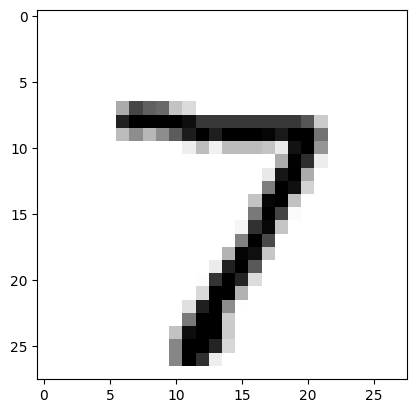

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Predicted Digit: 7


In [9]:
def predict_digit(image_index):
    plt.imshow(x_test[image_index], cmap=plt.cm.binary)
    plt.show()
    prediction = model.predict(np.expand_dims(x_test[image_index], axis=0))
    print(f"Predicted Digit: {np.argmax(prediction)}")

# Test a prediction
predict_digit(0)  # Try changing 0 to other numbers (1, 2, 3, ...)
